### Neural Nets Part 1

Let's run a Neural Net on the Pima Indians Diabetes dataset here. In practice you would never do this as it's much more efficient for the size of the data to do this using PCA+SVM/Logistic Regression/ etc. The dataset is even too small for random forests but this is more of an exploratory analysis!

The data is found here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv

In [1]:
import os
import tensorflow as tf
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import plot_model
import numpy as np
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split



In [2]:
training_data = pd.read_csv("pima-indians-diabetes.csv").values
# split into input (X) and output (Y) variables
X_values = training_data[:,0:8]
Y_values = training_data[:,8]
indices = range(X_values.shape[0])

x_train,x_test,y_train,y_test, indices_train, indices_test=train_test_split(X_values,Y_values,indices, test_size=0.3,random_state=123)


In [11]:
X_values.shape

(767, 8)

In [4]:
y_test

array([0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_values, Y_values, validation_data = (x_test,y_test), epochs=150, batch_size=10)
model.summary()


Epoch 1/150
77/77 [==============================] - 1s 3ms/step - loss: 6.8075 - accuracy: 0.5593 - val_loss: 2.9928 - val_accuracy: 0.5108
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 1.7445 - accuracy: 0.5007 - val_loss: 1.3488 - val_accuracy: 0.5238
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 1.0952 - accuracy: 0.5319 - val_loss: 1.0847 - val_accuracy: 0.5368
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8956 - accuracy: 0.6128 - val_loss: 0.8612 - val_accuracy: 0.5801
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7940 - accuracy: 0.6089 - val_loss: 0.8182 - val_accuracy: 0.6234
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7262 - accuracy: 0.6402 - val_loss: 0.7435 - val_accuracy: 0.6190
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.6389 - val_loss: 0.7102 - val_accuracy: 0.6494
Epoch 8/150
7

Epoch 59/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5403 - accuracy: 0.7353 - val_loss: 0.5332 - val_accuracy: 0.7316
Epoch 60/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7171 - val_loss: 0.5527 - val_accuracy: 0.7056
Epoch 61/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7366 - val_loss: 0.5516 - val_accuracy: 0.7229
Epoch 62/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5495 - accuracy: 0.7249 - val_loss: 0.5329 - val_accuracy: 0.7056
Epoch 63/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7340 - val_loss: 0.5703 - val_accuracy: 0.7013
Epoch 64/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5538 - accuracy: 0.7184 - val_loss: 0.5444 - val_accuracy: 0.7100
Epoch 65/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7392 - val_loss: 0.5686 - val_accuracy: 0.6883
Epoch 

77/77 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7497 - val_loss: 0.5157 - val_accuracy: 0.7359
Epoch 117/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7666 - val_loss: 0.4930 - val_accuracy: 0.7403
Epoch 118/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7562 - val_loss: 0.4886 - val_accuracy: 0.7619
Epoch 119/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5092 - accuracy: 0.7445 - val_loss: 0.5169 - val_accuracy: 0.7403
Epoch 120/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.7536 - val_loss: 0.4980 - val_accuracy: 0.7359
Epoch 121/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.7510 - val_loss: 0.4978 - val_accuracy: 0.7229
Epoch 122/150
77/77 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7497 - val_loss: 0.5030 - val_accuracy: 0.7403
Epoch 123/150

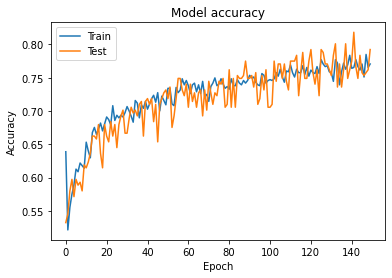

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

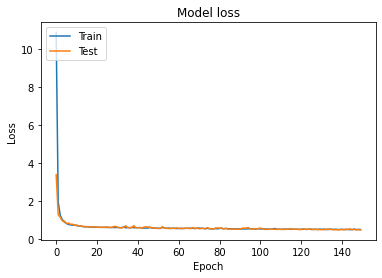

In [35]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [29]:
y_pred = model.predict(x_test)
y_pred_binary = y_pred > 0.5
y_pred

array([[0.16811004],
       [0.76740813],
       [0.1301795 ],
       [0.33708405],
       [0.86321664],
       [0.58729565],
       [0.2027897 ],
       [0.95702004],
       [0.06307831],
       [0.21795389],
       [0.14614314],
       [0.38062257],
       [0.15753943],
       [0.1323793 ],
       [0.18210712],
       [0.31801212],
       [0.2686906 ],
       [0.08179966],
       [0.20428467],
       [0.6350894 ],
       [0.39378276],
       [0.62835693],
       [0.27094537],
       [0.31232923],
       [0.46913925],
       [0.3854911 ],
       [0.19586244],
       [0.21509233],
       [0.20822728],
       [0.16668749],
       [0.10006696],
       [0.46312973],
       [0.52140474],
       [0.24599043],
       [0.28978115],
       [0.2970056 ],
       [0.18796343],
       [0.16876188],
       [0.07671276],
       [0.08212617],
       [0.2056191 ],
       [0.39272594],
       [0.3352859 ],
       [0.4268236 ],
       [0.55004966],
       [0.18282768],
       [0.26119253],
       [0.361

In [30]:
print(accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))

0.7922077922077922
              precision    recall  f1-score   support

         0.0       0.80      0.90      0.85       149
         1.0       0.77      0.60      0.67        82

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

[[134  15]
 [ 33  49]]


In [36]:
for layer in model.layers: print(layer.get_config(), layer.get_weights())

{'name': 'dense_12', 'trainable': True, 'batch_input_shape': (None, 8), 'dtype': 'float32', 'units': 12, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[ 0.93471926,  0.65980345, -0.3371493 , -0.1266469 , -0.32820553,
        -0.3294961 ,  0.59043705,  0.14600474,  0.09015923, -0.16583474,
         1.3060689 ,  0.6358263 ],
       [-0.43906617, -0.07858231, -0.11536701, -0.30698827,  0.07563895,
        -0.23670152, -0.04175495,  0.23923655,  0.06276187,  0.22111543,
        -0.25960642,  0.2518007 ],
       [-0.19750255,  0.16348971,  0.16411062,  0.36320183,  0.09942069,
        -0.55244833, -0.41562837,  0.17988066, -0.14069209,  0.3322967 ,
         0.08941881, -0.30047256],
       [ 0.05130656,  0.11309502,  

In [38]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_weights

array([[ 0.93471926,  0.65980345, -0.3371493 , -0.1266469 , -0.32820553,
        -0.3294961 ,  0.59043705,  0.14600474,  0.09015923, -0.16583474,
         1.3060689 ,  0.6358263 ],
       [-0.43906617, -0.07858231, -0.11536701, -0.30698827,  0.07563895,
        -0.23670152, -0.04175495,  0.23923655,  0.06276187,  0.22111543,
        -0.25960642,  0.2518007 ],
       [-0.19750255,  0.16348971,  0.16411062,  0.36320183,  0.09942069,
        -0.55244833, -0.41562837,  0.17988066, -0.14069209,  0.3322967 ,
         0.08941881, -0.30047256],
       [ 0.05130656,  0.11309502,  0.44459936, -0.77540535,  0.3126418 ,
         0.44764286,  0.01672554,  0.28450882, -0.48785123,  0.12247536,
        -0.12878475,  0.14092137],
       [ 0.01936215, -0.98814243,  0.02815175,  0.11724179, -0.49617922,
         0.18739662, -0.01703104, -0.01285398,  0.05836221, -0.0354513 ,
         0.22224692, -0.01322361],
       [ 0.10564964,  0.4123825 , -0.47695565, -0.3290071 , -0.34451276,
         0.39034444, -

### Note: Reminder, you would likely never do this!
#### This notebook is meant to just explore some small steps. In practice, you would: 

1) features need to be scaled (standardized (mean and variance!), pca, etc)

2) The data set is too small.

3) Simpler models will almost surely be as effective/predictive here.

4) You would use standard tools built into keras/pytorch etc (such as one hot encoding). See here: 
https://keras.io/getting_started/intro_to_keras_for_engineers/

5) Go back and read the documentation in step 4. This notebook is not enough!

### What about Random Forest?

In [41]:


from sklearn import ensemble
clf = ensemble.RandomForestClassifier(n_estimators = 1000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7445887445887446
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81       149
         1.0       0.66      0.57      0.61        82

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[125  24]
 [ 35  47]]


#### Better? Maybe but at what cost?